# Affichage de l'image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import math
from scipy import signal
import scipy as sc
import urllib

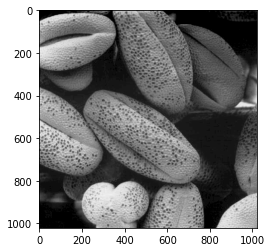

In [2]:
image = cv2.imread("Fig0208(a).tif",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

# Calcul du gradient de l'image

Gx [[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 254 254]
 [  0   0   0 ... 255 254 254]
 ...
 [  2   2   2 ... 255 252 252]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Gy [[  0   0   0 ... 253 253   0]
 [  0   0   0 ... 253 253   0]
 [  0   0   0 ... 252 252   0]
 ...
 [  0   0 252 ... 250 250   0]
 [  0   0 252 ... 250 250   0]
 [  0   0 252 ... 250 250   0]]


Text(0.5, 1.0, 'gy')

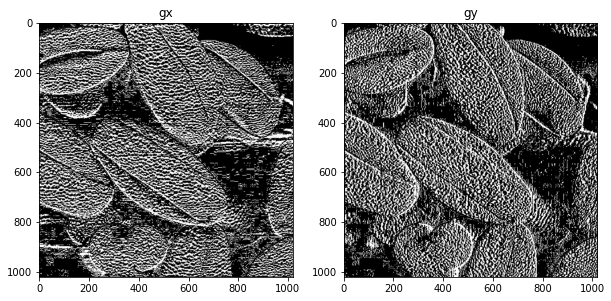

In [3]:
arr = np.array([1,0,-1])
r=arr.transpose()
gx = sc.ndimage.convolve1d(image,[1,0,-1], axis=0)
print('Gx', gx)
gy = sc.ndimage.convolve1d(image,r, axis=1)
print('Gy', gy)

#affichage 

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(1,2,2)
plt.imshow(gy, cmap='gray')
plt.title("gy")

# Magnitude et orientation

[[0.    0.    0.    ... 3.    3.    0.   ]
 [0.    0.    0.    ... 3.162 3.605 2.   ]
 [0.    0.    0.    ... 4.125 4.473 2.   ]
 ...
 [2.    2.    4.473 ... 6.082 7.21  4.   ]
 [0.    0.    4.    ... 6.    6.    0.   ]
 [0.    0.    4.    ... 6.    6.    0.   ]]


<ipython-input-4-72b5336a0000>:4: RuntimeWarning: divide by zero encountered in true_divide
  o=np.nan_to_num(np.degrees(np.arctan(gy/gx)),nan=90)
<ipython-input-4-72b5336a0000>:4: RuntimeWarning: invalid value encountered in true_divide
  o=np.nan_to_num(np.degrees(np.arctan(gy/gx)),nan=90)


Text(0.5, 1.0, 'Orientation')

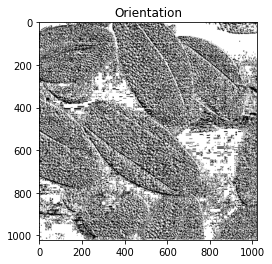

In [4]:
magnitude=np.sqrt((gx**2)+(gy**2))
magnitude
print(magnitude)
o=np.nan_to_num(np.degrees(np.arctan(gy/gx)),nan=90)
o
plt.imshow(o,cmap='gray')
plt.title("Orientation")


# Binarisation

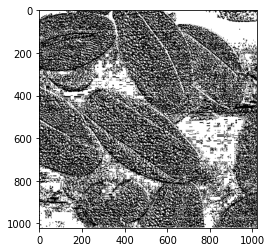

In [5]:
d=np.where(o>70, 1, 0)
d
plt.imshow(d,cmap='gray')

In [6]:
d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

# Dilatation et érosion

Text(0.5, 1.0, 'Erosion')

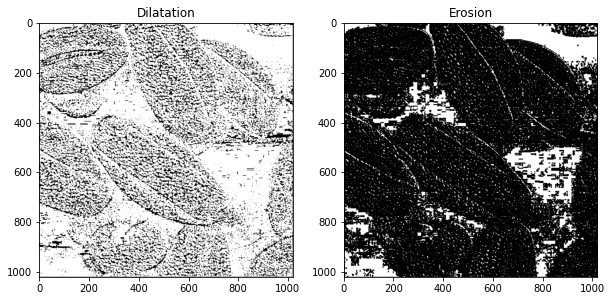

In [7]:
#-------------------------------------Dilatation---------------------------------------------
p,q= d.shape
imgDilate= np.zeros((p,q), dtype=np.uint8)
array= np.array([[1,0,1], [0,0,0],[1,0,1]])
const1=1
for i in range(const1, p-const1):
    for j in range(const1,q-const1):
        temp= d[i-const1:i+const1+1, j-const1:j+const1+1]
        r= temp*array
        imgDilate[i,j]= np.max(r)

#-------------------------------------Erosion---------------------------------------------
        
m,n= d.shape 
k=3
arr= np.ones((k,k), dtype=np.uint8)
const= (k-1)//2
imgErode= np.zeros((m,n), dtype=np.uint8)
for i in range(const, m-const):
    for j in range(const,n-const):
        temp= d[i-const:i+const+1, j-const:j+const+1]
        r= temp*arr
        imgErode[i,j]= np.min(r)
        
#-------------------------------------Affichage---------------------------------------------        
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(imgDilate, cmap='gray')
plt.title("Dilatation")
plt.subplot(1,2,2)
plt.imshow(imgErode, cmap='gray')
plt.title("Erosion")


#  Opérateur de Sobel

In [8]:
[rows, columns] = np.shape(image)
sobel_filtered_image = np.zeros(shape=(rows, columns))
sobel_filtered_x = np.zeros(shape=(rows, columns))
sobel_filtered_y = np.zeros(shape=(rows, columns))

#sobel kernels
sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
#calcul
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(sobel_x, image[i:i + 3, j:j + 3]))     #derivee x
        sobel_filtered_x[i+1,j+1]=gx                                        #store
        gy = np.sum(np.multiply(sobel_y, image[i:i + 3, j:j + 3]))     #derivee y
        sobel_filtered_y[i+1,j+1]=gy                                        #store
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2) 

Text(0.5, 1.0, 'sobel filtered image')

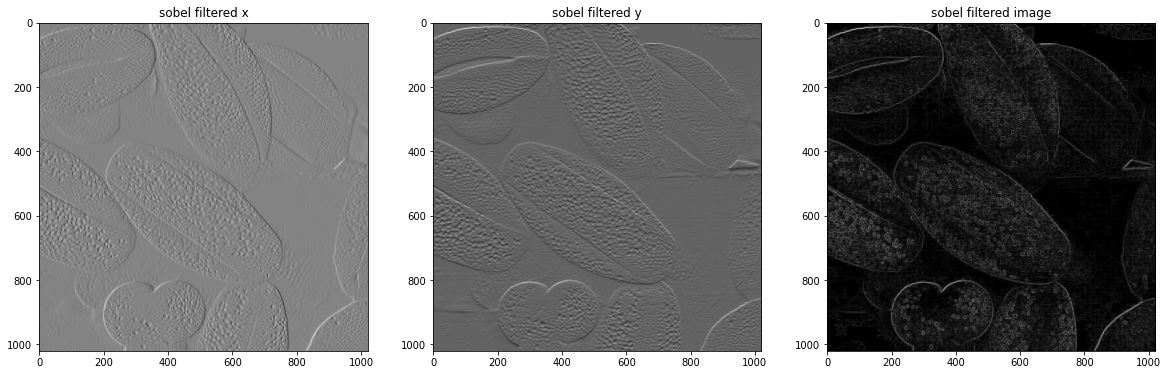

In [9]:
#Affichage
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(sobel_filtered_x, cmap='gray')
plt.title("sobel filtered x")
plt.subplot(1,3,2)
plt.imshow(sobel_filtered_y, cmap='gray')
plt.title("sobel filtered y")
plt.subplot(1,3,3)
plt.imshow(sobel_filtered_image, cmap = 'gray')
plt.title("sobel filtered image")

# Opérateur de Prewitt

In [10]:
prewitt_filtered_image = np.zeros(shape=(rows, columns))
prewitt_filtered_x = np.zeros(shape=(rows, columns))
prewitt_filtered_y = np.zeros(shape=(rows, columns))
#Prewitt kernels
prewitt_y = np.array([[-1, -1, -1], 
                    [0, 0, 0], 
                    [1, 1, 1]])

prewitt_x = np.array([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])
#calcul
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(prewitt_x, image[i:i + 3, j:j + 3]))     #derivee x
        prewitt_filtered_x[i+1,j+1]=gx                                        #store
        gy = np.sum(np.multiply(prewitt_y, image[i:i + 3, j:j + 3]))     #derivee y
        prewitt_filtered_y[i+1,j+1]=gy                                        #store 
        prewitt_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2) 

Text(0.5, 1.0, 'prewitt filtered image')

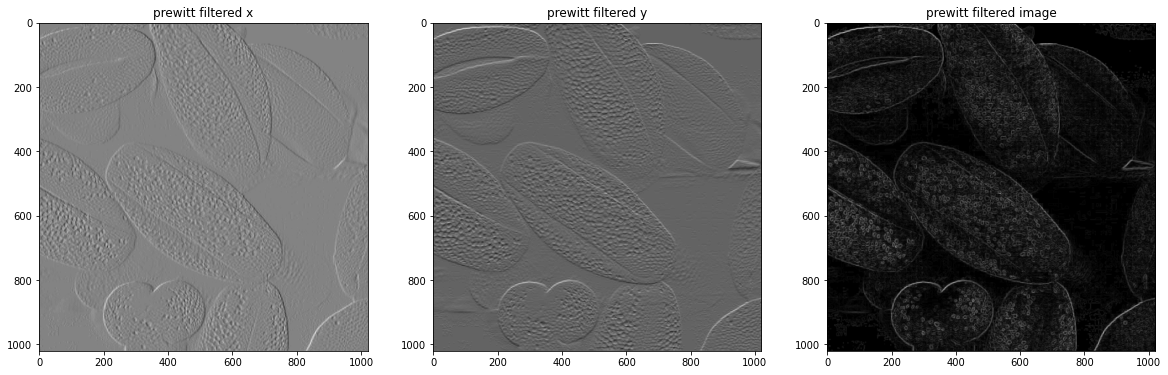

In [11]:
#Affichage
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(prewitt_filtered_x, cmap='gray')
plt.title("prewitt filtered x")
plt.subplot(1,3,2)
plt.imshow(prewitt_filtered_y, cmap='gray')
plt.title("prewitt filtered y")
plt.subplot(1,3,3)
plt.imshow(prewitt_filtered_image, cmap = 'gray')
plt.title("prewitt filtered image")

# Filtre Laplacien

In [12]:
ima = cv2.imread("enstein.tif",cv2.IMREAD_GRAYSCALE)
[rows, columns] = np.shape(ima)
laplacien_filtered_image = np.zeros(shape=(rows, columns))
laplacien_filtered = np.zeros(shape=(rows, columns))
laplacien = np.array([[0, 1, 0], 
                    [1, -4, 1], 
                    [0,1, 0]])

for i in range(rows - 2):
    for j in range(columns - 2):
        R = np.sum(np.multiply(laplacien, ima[i:i + 3, j:j + 3]))     
        laplacien_filtered[i+1,j+1]=R                                     

Text(0.5, 1.0, 'Resultat')

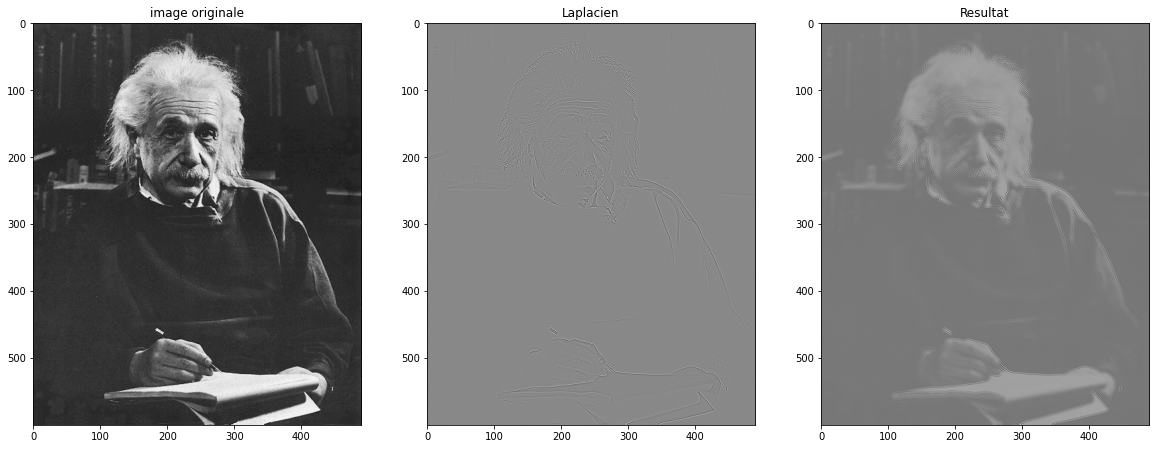

In [13]:
#Affichage
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(ima, cmap='gray')
plt.title("image originale")
plt.subplot(1,3,2)
plt.imshow(laplacien_filtered, cmap='gray')
plt.title("Laplacien")
plt.subplot(1,3,3)
plt.imshow(ima + laplacien_filtered, cmap = 'gray')
plt.title("Resultat")

# Filtre gaussien

In [14]:
def convolution_gauss(imagee, kernel):
    image_h = imagee.shape[0]
    image_w = imagee.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    if(len(imagee.shape) == 3):
        image2 = np.pad(imagee, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(imagee.shape) == 2):
        image2 = np.pad(imagee, pad_width=(
            (kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    h = kernel_h // 2
    w = kernel_w // 2
    image_conv = np.zeros(image2.shape)
    for i in range(h, image2.shape[0]-h):
        for j in range(w, image2.shape[1]-w):
            x = image2[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]
                                                                                                                       
                                                                                                                       
                                                                                                                       
def Gaussian_Filtre(image, sigma):
    image = cv2.imread("enstein.tif",cv2.IMREAD_GRAYSCALE)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    im_filtered[:, :] = convolution_gauss(image[:, :], gaussian_filter)
    return (im_filtered.astype(np.uint8))

gauss1=Gaussian_Filtre(image, 1)
gauss1
gauss2=Gaussian_Filtre(image, 5)
gauss3=Gaussian_Filtre(image, 15)

Text(0.5, 1.0, 'sigma=15')

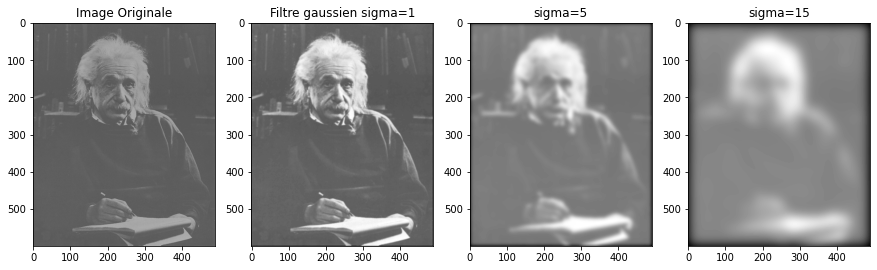

In [15]:
#Affichage
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
image = cv2.imread("enstein.tif")
plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.subplot(1,4,2)
plt.imshow(gauss1, cmap='gray')
plt.title("Filtre gaussien sigma=1")
plt.subplot(1,4,3)
plt.imshow(gauss2, cmap='gray')
plt.title("sigma=5")
plt.subplot(1,4,4)
plt.imshow(gauss3, cmap='gray')
plt.title("sigma=15")

# Filtre Moyenneur

Text(0.5, 1.0, 'Filtre moyenneur')

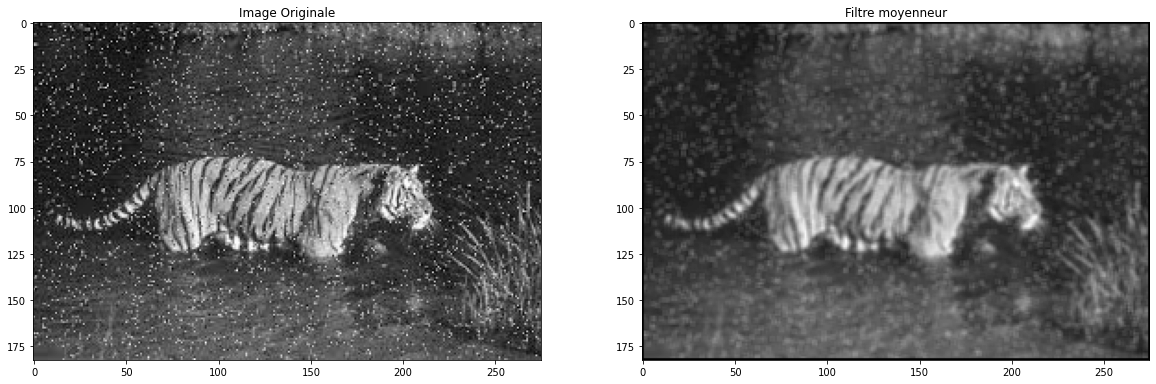

In [16]:
#Load image from url
req = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSod4zKZUUAFj86lTk0I2_l4-ULOivoY3iorQ&usqp=CAU')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, -1) 
plt.imsave("tigre.png", img1, cmap='gray')
img = cv2.imread("tigre.png",0)
m,n=img.shape


K = np.ones([3, 3], dtype = int)
K = K / 9
img_new = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*K[0, 0]+img[i-1, j]*K[0, 1]+img[i-1, j + 1]*K[0, 2]+img[i, j-1]*K[1, 0]+ img[i, j]*K[1, 1]+img[i, j + 1]*K[1, 2]+img[i + 1, j-1]*K[2, 0]+img[i + 1, j]*K[2, 1]+img[i + 1, j + 1]*K[2, 2]  
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Image Originale")
plt.subplot(1,2,2)
plt.imshow(img_new, cmap='gray')
plt.title("Filtre moyenneur")                            


# Filtre médian

Text(0.5, 1.0, 'Filtre médian')

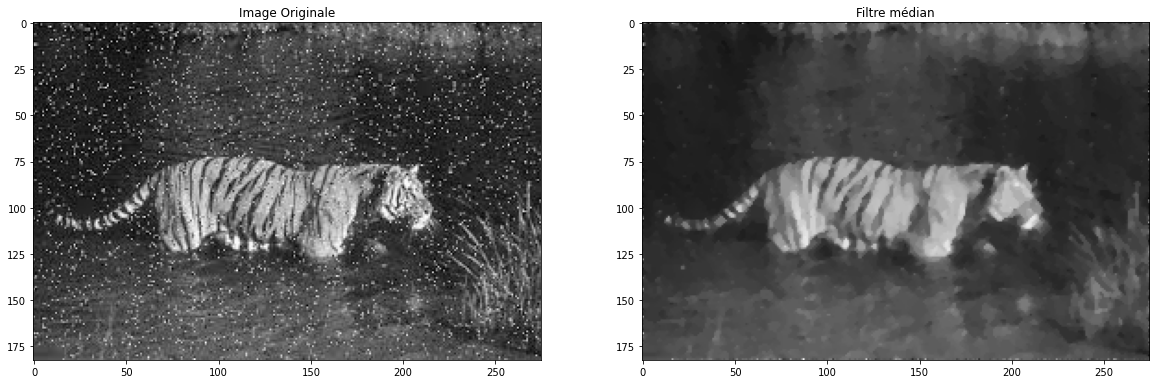

In [17]:
M=img1.copy()
shape = M.shape
pixel = np.zeros((9))
#Filtre médian
for i in range(shape[0]-1):
    for j in range(shape[1]-1):
        if j > 0 and i > 0:
            pixel[0] = M[i-1,j-1,0]
            pixel[1] = M[i-1,j,0]
            pixel[2] = M[i-1,j+1,0]
            pixel[3] = M[i,j-1,0]
            pixel[4] = M[i,j,0]
            pixel[5] = M[i,j+1,0]
            pixel[6] = M[i+1,j-1,0]
            pixel[7] = M[i+1,j,0]
            pixel[8] = M[i+1,j+1,0]
            s = np.sort(pixel, axis=None)  
            M[i,j,0] = s[4]
            M[i,j,1] = s[4]
            M[i,j,2] = s[4]

#Affichage
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Image Originale")
plt.subplot(1,2,2)
plt.imshow(M, cmap='gray')
plt.title("Filtre médian")